Use results from GWAS model: outcome ~ sex + age + SNP + PC1-5

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import sys

# sys.path.append('/data100t1/home/wanying/CCHC/lipidomics/code/utils')
# from manhattan_plot import manhattan_plot

In [165]:
def manhattan_plot(data: pd.core.frame.DataFrame, pval: str='pval', position: str='pos',
                   chromosome: str='chr', gene: str='', title: str='manhattan plot',
                   sig_pval: float=-1, annotate: bool=False, colors: list=['black','grey'],
                   markersize: float=2, dpi: float=200, figsize: tuple=(12,4)):
    '''
    Plot Manhattan plot from summary statistics
    Params
    - data: A dataframe containing summary statistics
    - pval: column name of p values
    - position: column name of position
    - chromosome: column name of chromosome
    - gene: column of gene names for annotation (only used if annotate=True)
    - title: figure title
    - sig_pval: threshold of significant p value (No multiple testing correction will be applied on this threshold)
                Default values -1 implies 0.05/number_of_tests is used.
    - annotate: anotate significant points (BF correction)
    - colors: list of colors to plot each chromosome. Default is ['black','grey']
    - markersize: default is 2. Size of markers
    - dpi, figsize: resolution and figure size
    Return
    - fig, ax
    '''
    if annotate: # If name of gene column is provided
        data_copy = data[[gene, chromosome, position, pval]].sort_values(by=[chromosome, position]).copy()
    else:
        data_copy = data[[chromosome, position, pval]].sort_values(by=[chromosome, position]).copy()
        
    data_copy['indx'] = [x for x in range(len(data_copy))] # Create arbitrary indices for plotting
    data_copy['log_pval'] = -np.log10(data_copy[pval]) # Plot -log10 pvalues
    label_text, label_pos = [], [] # Keep track of label text and label positions
    grouped = data_copy.groupby(by=chromosome)
    
    fig, ax = plt.subplots(dpi=dpi, figsize=figsize)
    count=0
    for chr_num, df in grouped: # Plot each group (grouped by chromosome)
        label_text.append(chr_num)
        label_pos.append(df['indx'].mean())
        # ax.scatter(df['indx'], df['log_pval'], s=markersize, color=colors[count%len(colors)],
        #            edgecolors='w', linewidths=0.05, alpha=0.8)
        ax.scatter(df['indx'], df['log_pval'], s=markersize, color=colors[count%len(colors)])
        count += 1
        
    if title is not None: ax.set_title(title)
    ax.set_xlabel('Chromosome')
    ax.set_ylabel('-$log_{10}(p)$')
    
    # Plot significant line of p value
    if sig_pval == -1: sig_pval = 0.05/len(data_copy)
    ax.axhline(y=-np.log10(sig_pval), lw=0.5)
    ax.set_xticks([label_pos[i] for i in range(0, len(label_pos), 2)])
    ax.set_xticklabels([label_text[i] for i in range(0, len(label_text), 2)], fontsize='8')
    
    if annotate:
        if gene=='': raise ValueError('name of gene column cannot be empty')
        sig_points = data_copy[data_copy[pval]<=sig_pval] # Significant data points
        for i in range(len(sig_points)):
            tmp = sig_points.iloc[[i],:] # Cut the temp data for plotting
            ax.annotate(text=tmp[gene].values[0],
                        xy=(tmp['indx'].values[0], tmp['log_pval'].values[0]), fontsize='5')
    
    return fig, ax

In [4]:
path = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_noadj_BMI_AGE2'
fn = 'AC-10:0-.fastGWA'
df = pd.read_csv(f'{path}/{fn}', sep='\t')

In [36]:
df_for_plot = pd.read_csv('sample_gwas_result.fasGWA', sep='\t')
df_for_plot.head(2)

,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P
0,1,chr1:635098:T:G,635098,G,T,2287,0.000219,-1.886220,0.984579,0.055395
1,1,chr1:854218:G:A,854218,A,G,2287,0.000437,-0.837467,0.696355,0.229114


(<Figure size 2400x800 with 1 Axes>,
 <Axes: title={'center': 'test'}, xlabel='Chromosome', ylabel='-$log_{10}(p)$'>)

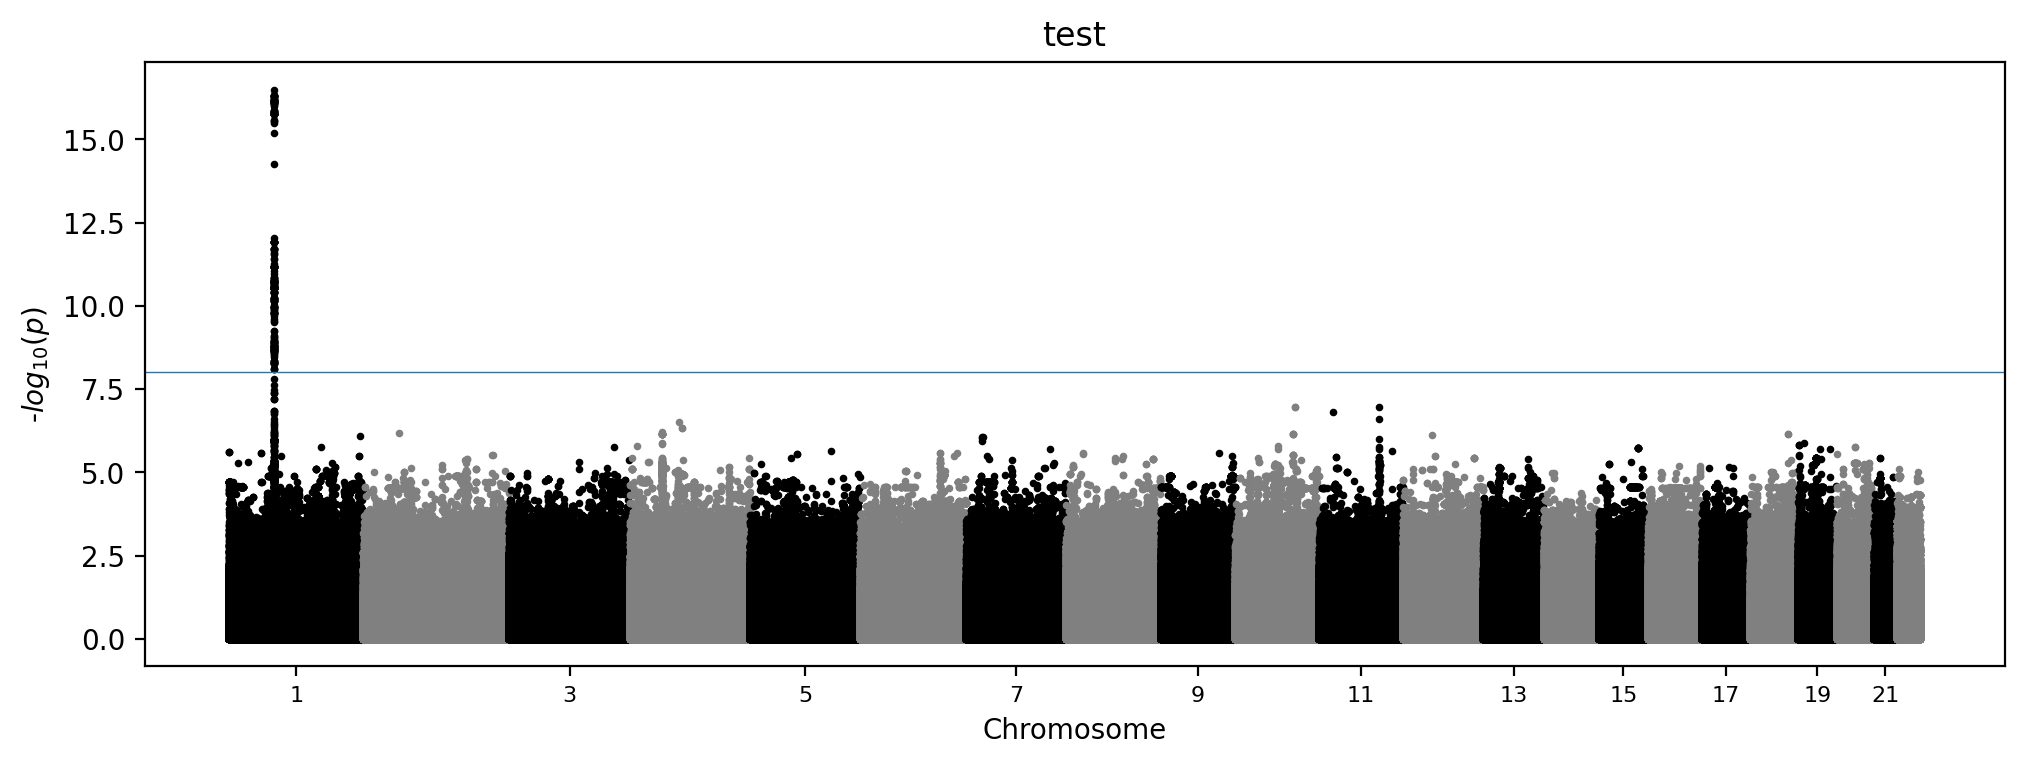

In [104]:
manhattan_plot(data=df, pval='P', position='POS', chromosome='CHR',
               title='test', sig_pval=1e-8, markersize=3, figsize=(12,4))

(<Figure size 2400x800 with 1 Axes>,
 <Axes: title={'center': 'test'}, xlabel='Chromosome', ylabel='-$log_{10}(p)$'>)

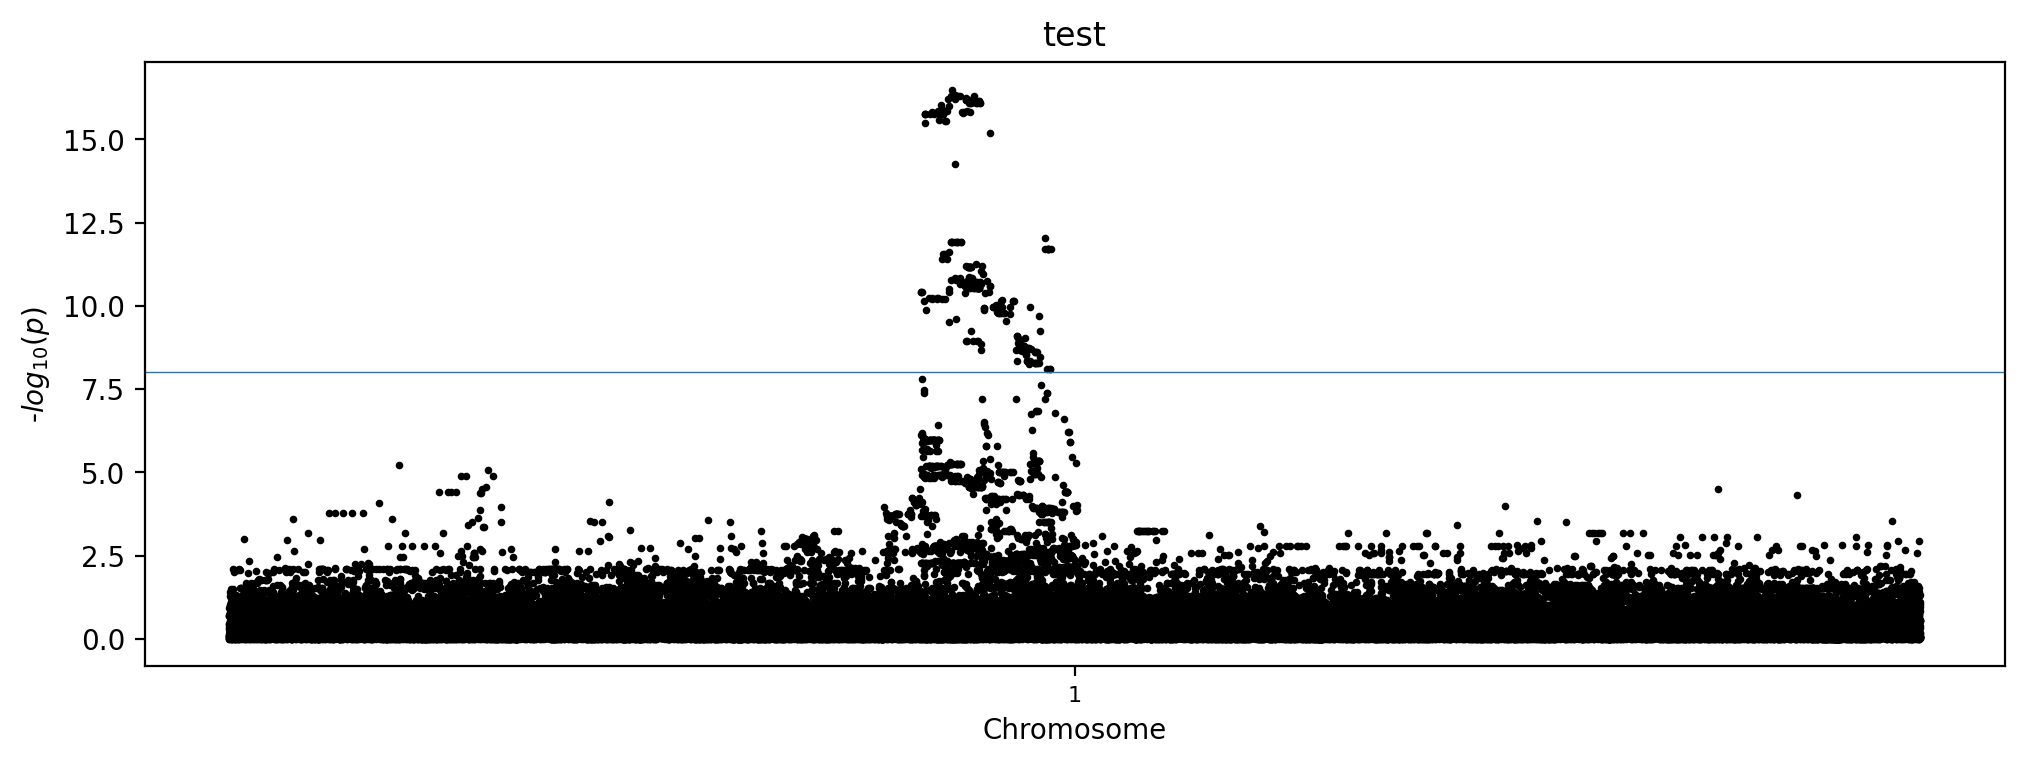

In [114]:
manhattan_plot(data=df[df['CHR']==1].iloc[1174327:1244327, :], pval='P', position='POS', chromosome='CHR',
               title='test', sig_pval=1e-8, markersize=3, figsize=(12,4))

,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P
0,1,chr1:10930:G:A,10930,A,G,1606,0.002491,-0.364964,0.344192,0.288985
1,1,chr1:10989:G:A,10989,A,G,1606,0.000623,-0.310252,0.687293,0.651693
2,1,chr1:11171:CCTTG:C,11171,C,CCTTG,1606,0.020237,0.075183,0.121066,0.534592
3,1,chr1:16375:G:C,16375,C,G,1606,0.000311,-0.255215,0.971717,0.792825
4,1,chr1:20489:G:T,20489,T,G,1606,0.000311,-0.418418,0.971682,0.666751


(<Figure size 2400x800 with 1 Axes>,
 <Axes: title={'center': 'test'}, xlabel='Chromosome', ylabel='-$log_{10}(p)$'>)

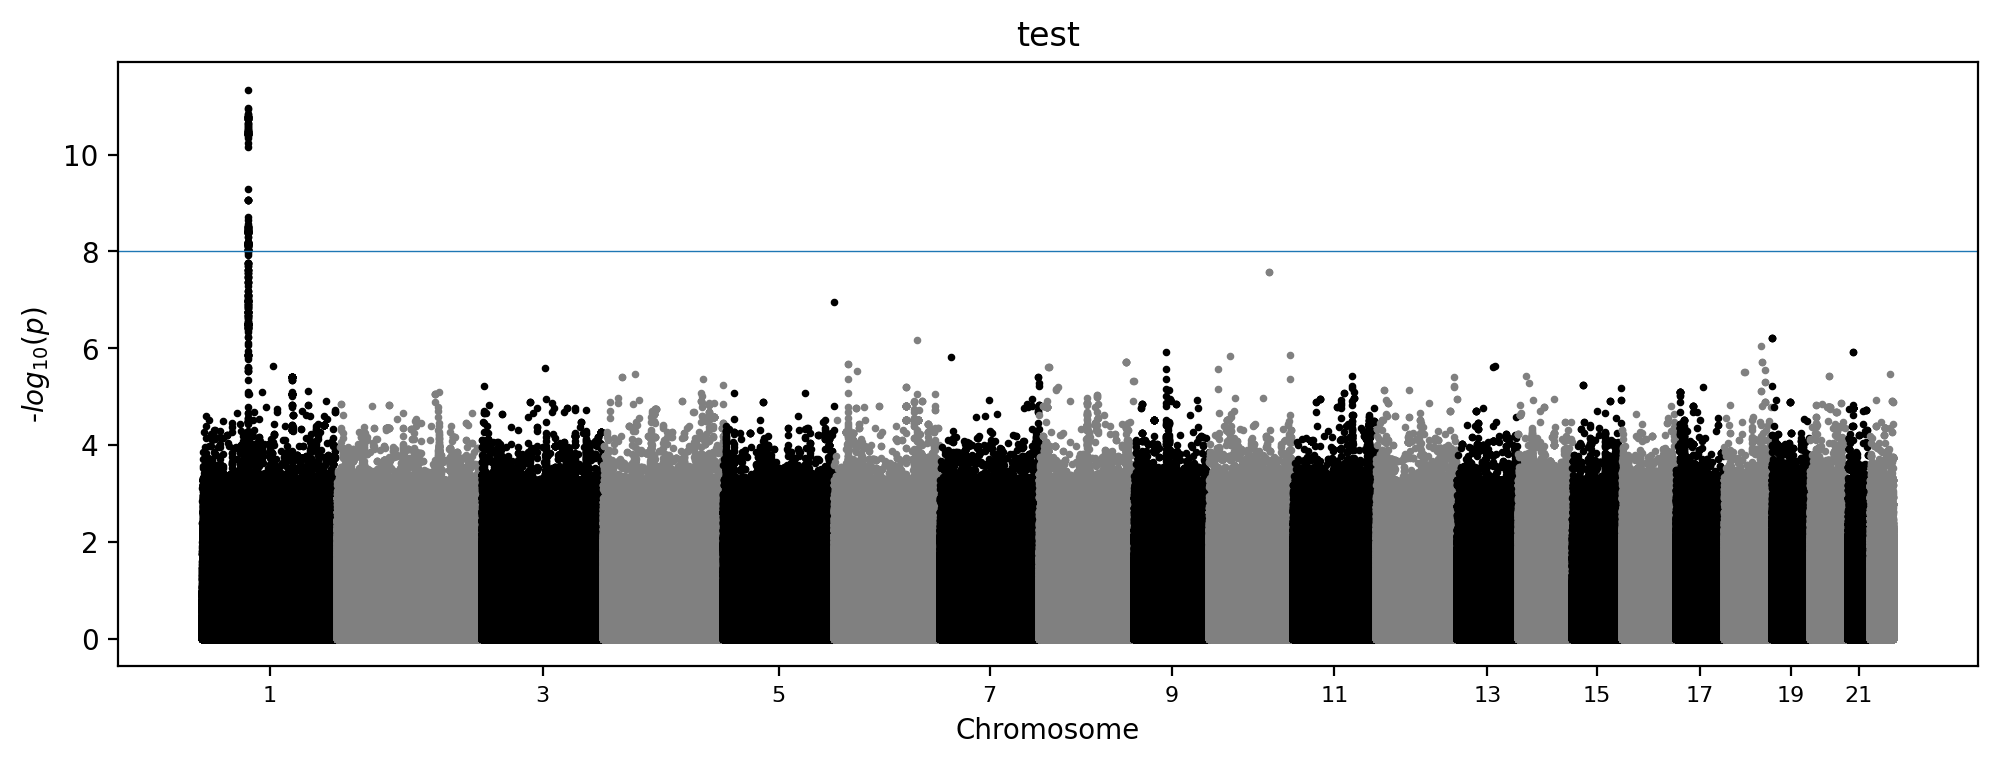

In [124]:
# Plot GWAS results on the trainingset
# Note: GWAS was done using residuals
path = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_species'
fn = 'AC-10:0-.fastGWA'
df_subset = pd.read_csv(f'{path}/{fn}', sep='\t')
display(df_subset.head())

manhattan_plot(data=df_subset, pval='P', position='POS', chromosome='CHR',
               title='test', sig_pval=1e-8, markersize=3, figsize=(12,4))

In [206]:
def miami_plot(data_1: pd.core.frame.DataFrame, data_2: pd.core.frame.DataFrame, pval: str='pval', pval_2: str='pval',
               position: str='pos', chromosome: str='chr', gene: str='', title: str='miami plot',
               sig_pval: float=-1, hightlight_threshold=1e-5, annotate: bool=False, colors: list=['black','grey'],
               markersize: float=2, markersize_2: float=-1, dpi: float=200, figsize: tuple=(12,8)):
    '''
    Create Miami plot from summary statistics
    Params
    - data_1, data_2: dataframes containing summary statistics. Plot data_1 on top and data_2 at the bottome
    - pval: column name of p values
    - position: column name of position
    - chromosome: column name of chromosome
    - gene: column of gene names for annotation (only used if annotate=True)
    - title: figure title
    - sig_pval: threshold of significant p value (No multiple testing correction will be applied on this threshold)
                Default values -1 implies 0.05/number_of_tests is used.
    - hightlight_threshold=1e-5: highlight dots <= given pval threshold in the bottom plot
    - annotate: anotate significant points (BF correction)
    - colors: list of colors to plot each chromosome. Default is ['black','grey']
    - markersize: default is 2. Size of markers
    - dpi, figsize: resolution and figure size
    Return
    - fig, ax
    '''
    # ############### Plot top plot ###############
    if annotate: # If name of gene column is provided
        data_copy = data_1[[gene, chromosome, position, pval]].sort_values(by=[chromosome, position]).copy()
    else:
        data_copy = data_1[[chromosome, position, pval]].sort_values(by=[chromosome, position]).copy()
        
    data_copy['indx'] = [x for x in range(len(data_copy))] # Create arbitrary indices for plotting
    data_copy['log_pval'] = -np.log10(data_copy[pval]) # Plot -log10 pvalues
    label_text, label_pos = [], [] # Keep track of label text and label positions
    grouped = data_copy.groupby(by=chromosome)
    
    fig, ax = plt.subplots(nrows=2, dpi=dpi, figsize=figsize, sharex=True)
    count=0
    for chr_num, df in grouped: # Plot each group (grouped by chromosome)
        label_text.append(chr_num)
        label_pos.append(df['indx'].mean())
        ax[0].scatter(df['indx'], df['log_pval'], s=markersize, color=colors[count%len(colors)])
        count += 1
        
    # ax[0].set_xlabel('Chromosome')
    ax[0].set_ylabel('-$log_{10}(p)$')
    
    # Plot significant line of p value
    if sig_pval == -1: sig_pval = 0.05/len(data_copy)
    ax[0].axhline(y=-np.log10(sig_pval), lw=0.5)
    ax[0].set_xticks([label_pos[i] for i in range(0, len(label_pos), 2)])
    ax[0].set_xticklabels([label_text[i] for i in range(0, len(label_text), 2)], fontsize='8')
    
    if annotate:
        if gene=='': raise ValueError('name of gene column cannot be empty')
        sig_points = data_copy[data_copy[pval]<=sig_pval] # Significant data points
        for i in range(len(sig_points)):
            tmp = sig_points.iloc[[i],:] # Cut the temp data for plotting
            ax[0].annotate(text=tmp[gene].values[0],
                        xy=(tmp['indx'].values[0], tmp['log_pval'].values[0]), fontsize='5')
    ax[0].spines[['right', 'top']].set_visible(False)
    
    
    # ############### Plot bottom plot ###############
    data_copy_2 = data_2[[chromosome, position, pval, pval_2]].sort_values(by=[chromosome, position]).copy()
    data_copy_2['indx'] = [x for x in range(len(data_copy_2))] # Create arbitrary indices for plotting
    label_text, label_pos = [], [] # Keep track of label text and label positions
    grouped = data_copy_2.groupby(by=chromosome)
    
    count=0
    if markersize_2==-1: markersize_2 = markersize
    for chr_num, df in grouped: # Plot each group (grouped by chromosome)
        label_text.append(chr_num)
        label_pos.append(df['indx'].mean())
        ax[1].scatter(df['indx'], df[pval_2], s=markersize, color=colors[count%len(colors)])
        ax[1].scatter(df[df[pval]<=hightlight_threshold]['indx'], 
                      df[df[pval]<=hightlight_threshold][pval_2],
                      s=markersize_2, c='r')
        count += 1
        
    # ax[1].set_xlabel('Chromosome')
    ax[1].set_ylabel(pval_2)
    ax[1].yaxis.set_inverted(True)
    ax[1].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[1].spines[['right', 'bottom']].set_visible(False)
    
    if title is not None: fig.suptitle(title)
    fig.tight_layout()
    return fig, ax

(<Figure size 2400x1600 with 2 Axes>,
 array([<Axes: ylabel='-$log_{10}(p)$'>, <Axes: ylabel='BETA'>],
       dtype=object))

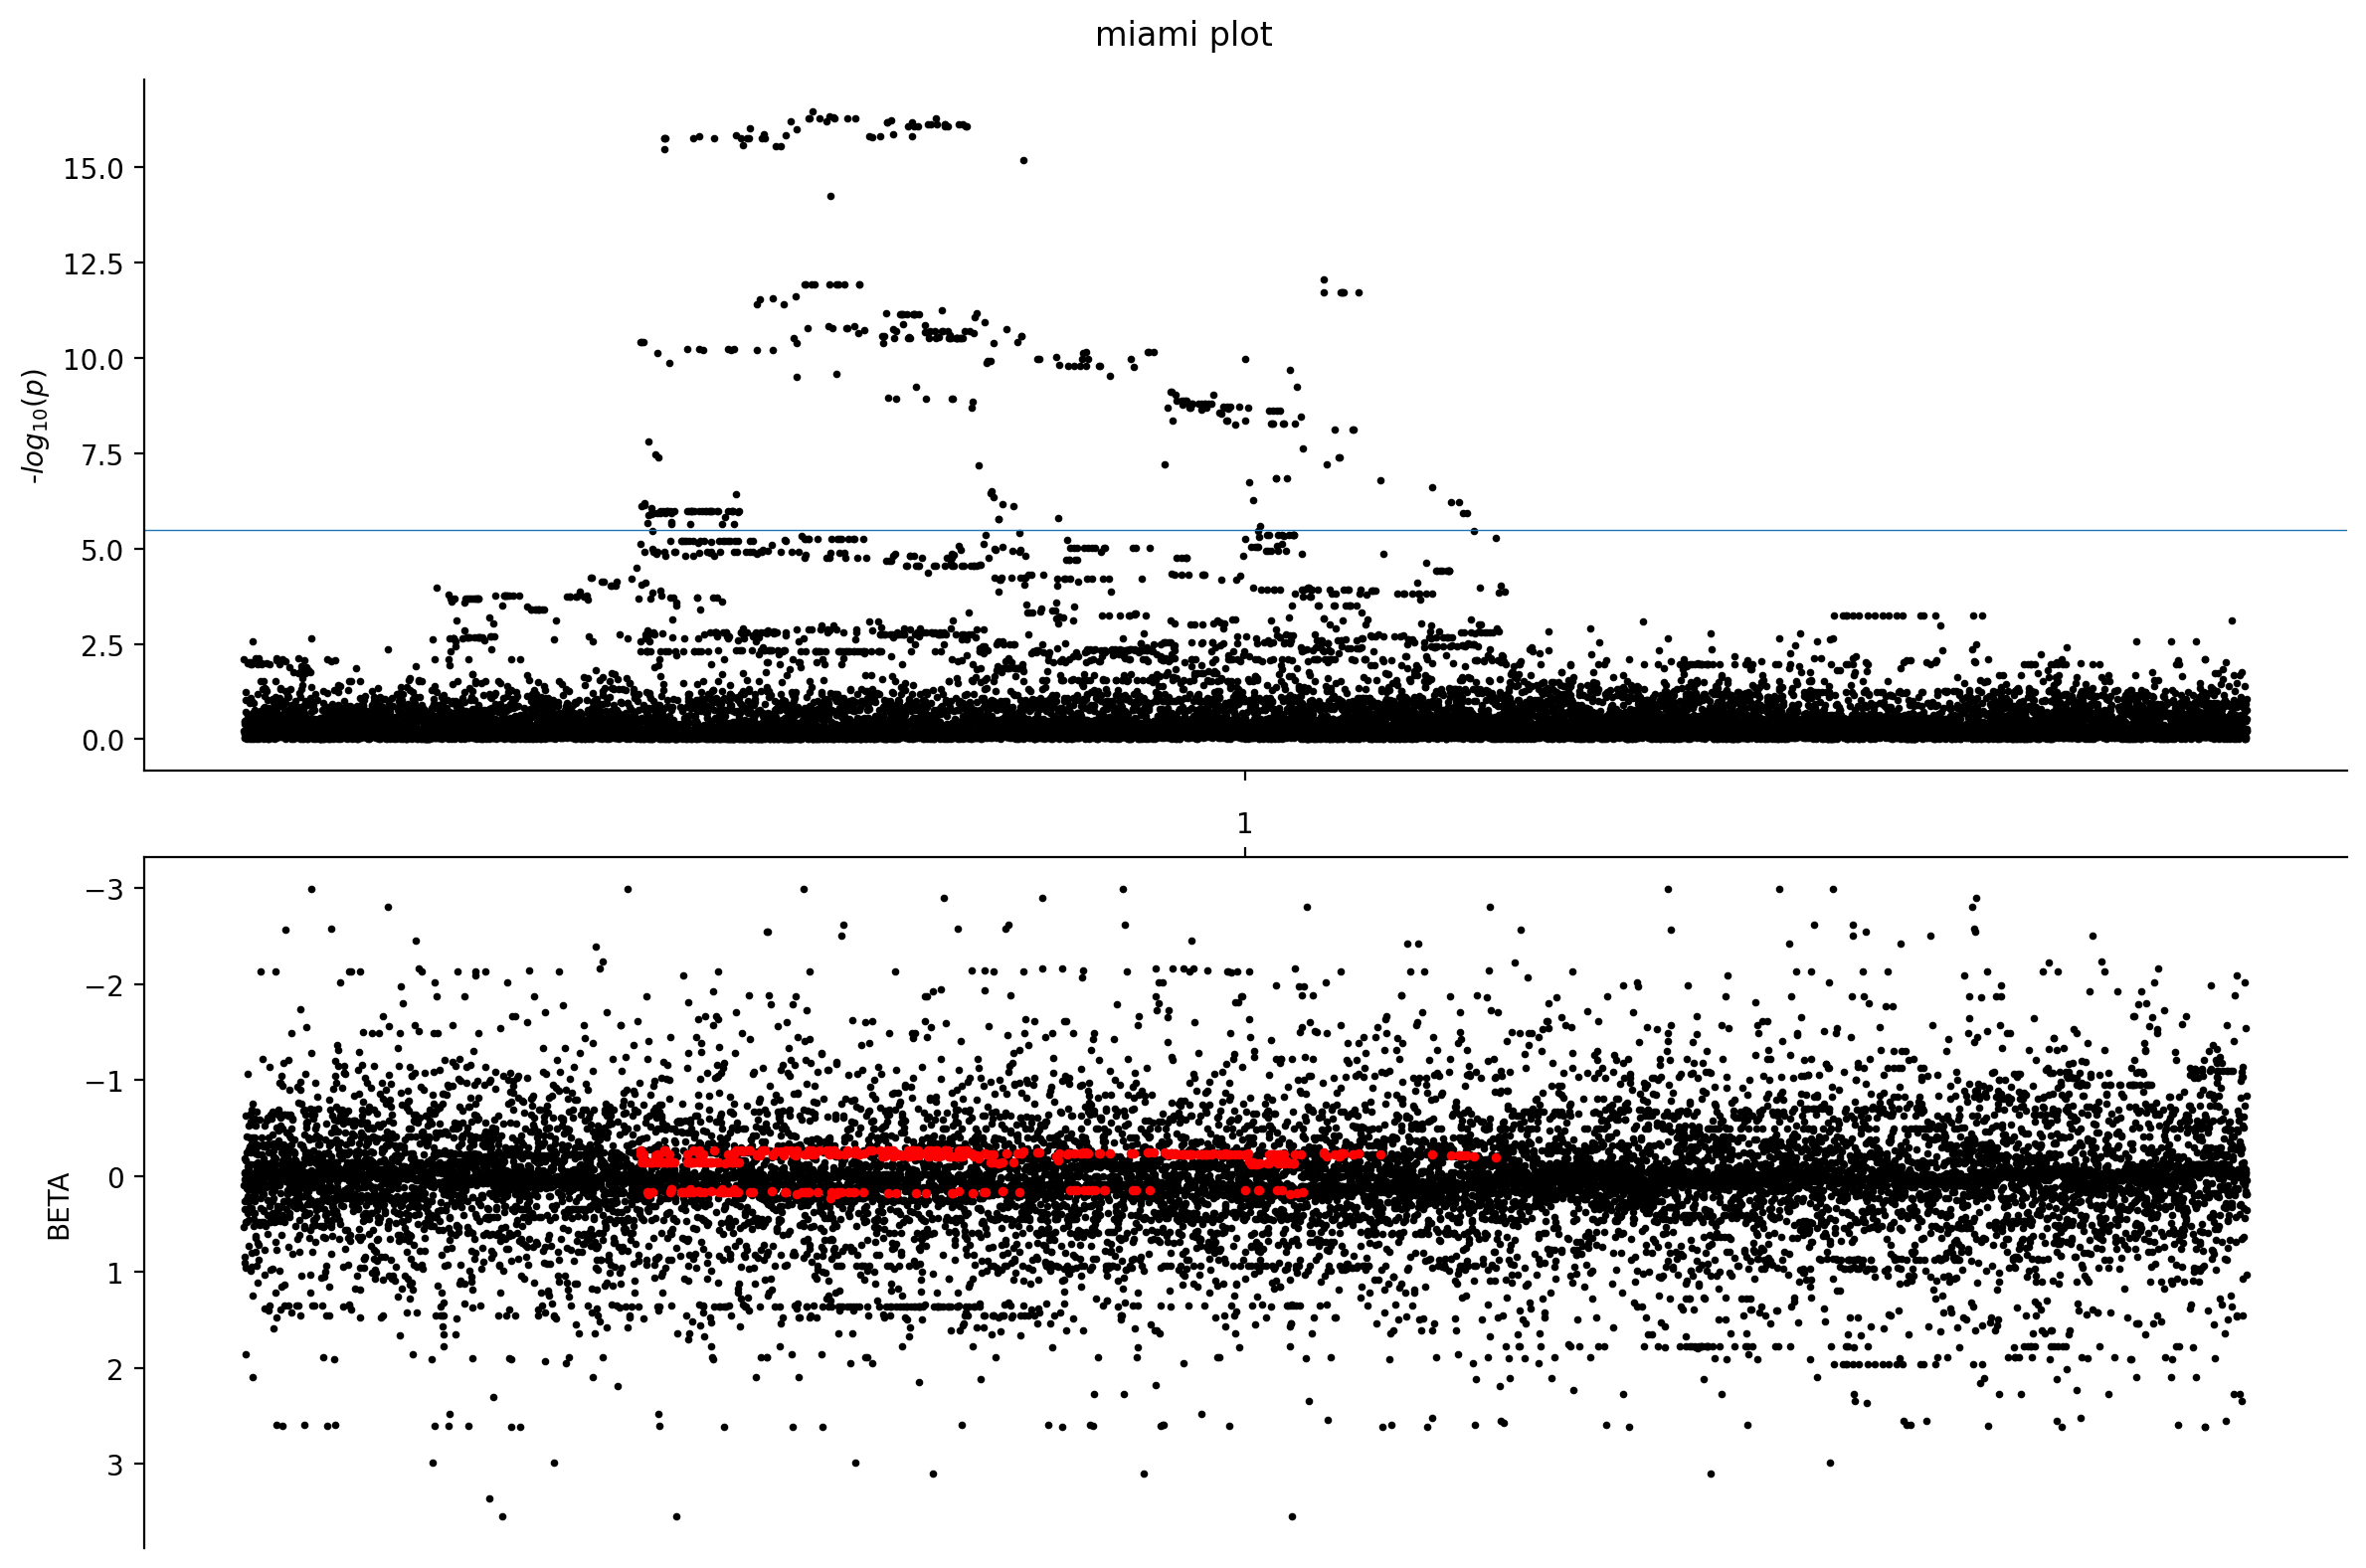

In [207]:
df_for_miami_plot = df[df['CHR']==1].iloc[1200000:1215000, :]
miami_plot(data_1=df_for_miami_plot, data_2=df_for_miami_plot, pval='P', pval_2='BETA',
           markersize=3, markersize_2=6, position='POS', chromosome='CHR', hightlight_threshold=1e-5)

,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P
0,1,chr1:10930:G:A,10930,A,G,1606,0.002491,-0.364964,0.344192,0.288985
1,1,chr1:10989:G:A,10989,A,G,1606,0.000623,-0.310252,0.687293,0.651693
2,1,chr1:11171:CCTTG:C,11171,C,CCTTG,1606,0.020237,0.075183,0.121066,0.534592
3,1,chr1:16375:G:C,16375,C,G,1606,0.000311,-0.255215,0.971717,0.792825
4,1,chr1:20489:G:T,20489,T,G,1606,0.000311,-0.418418,0.971682,0.666751


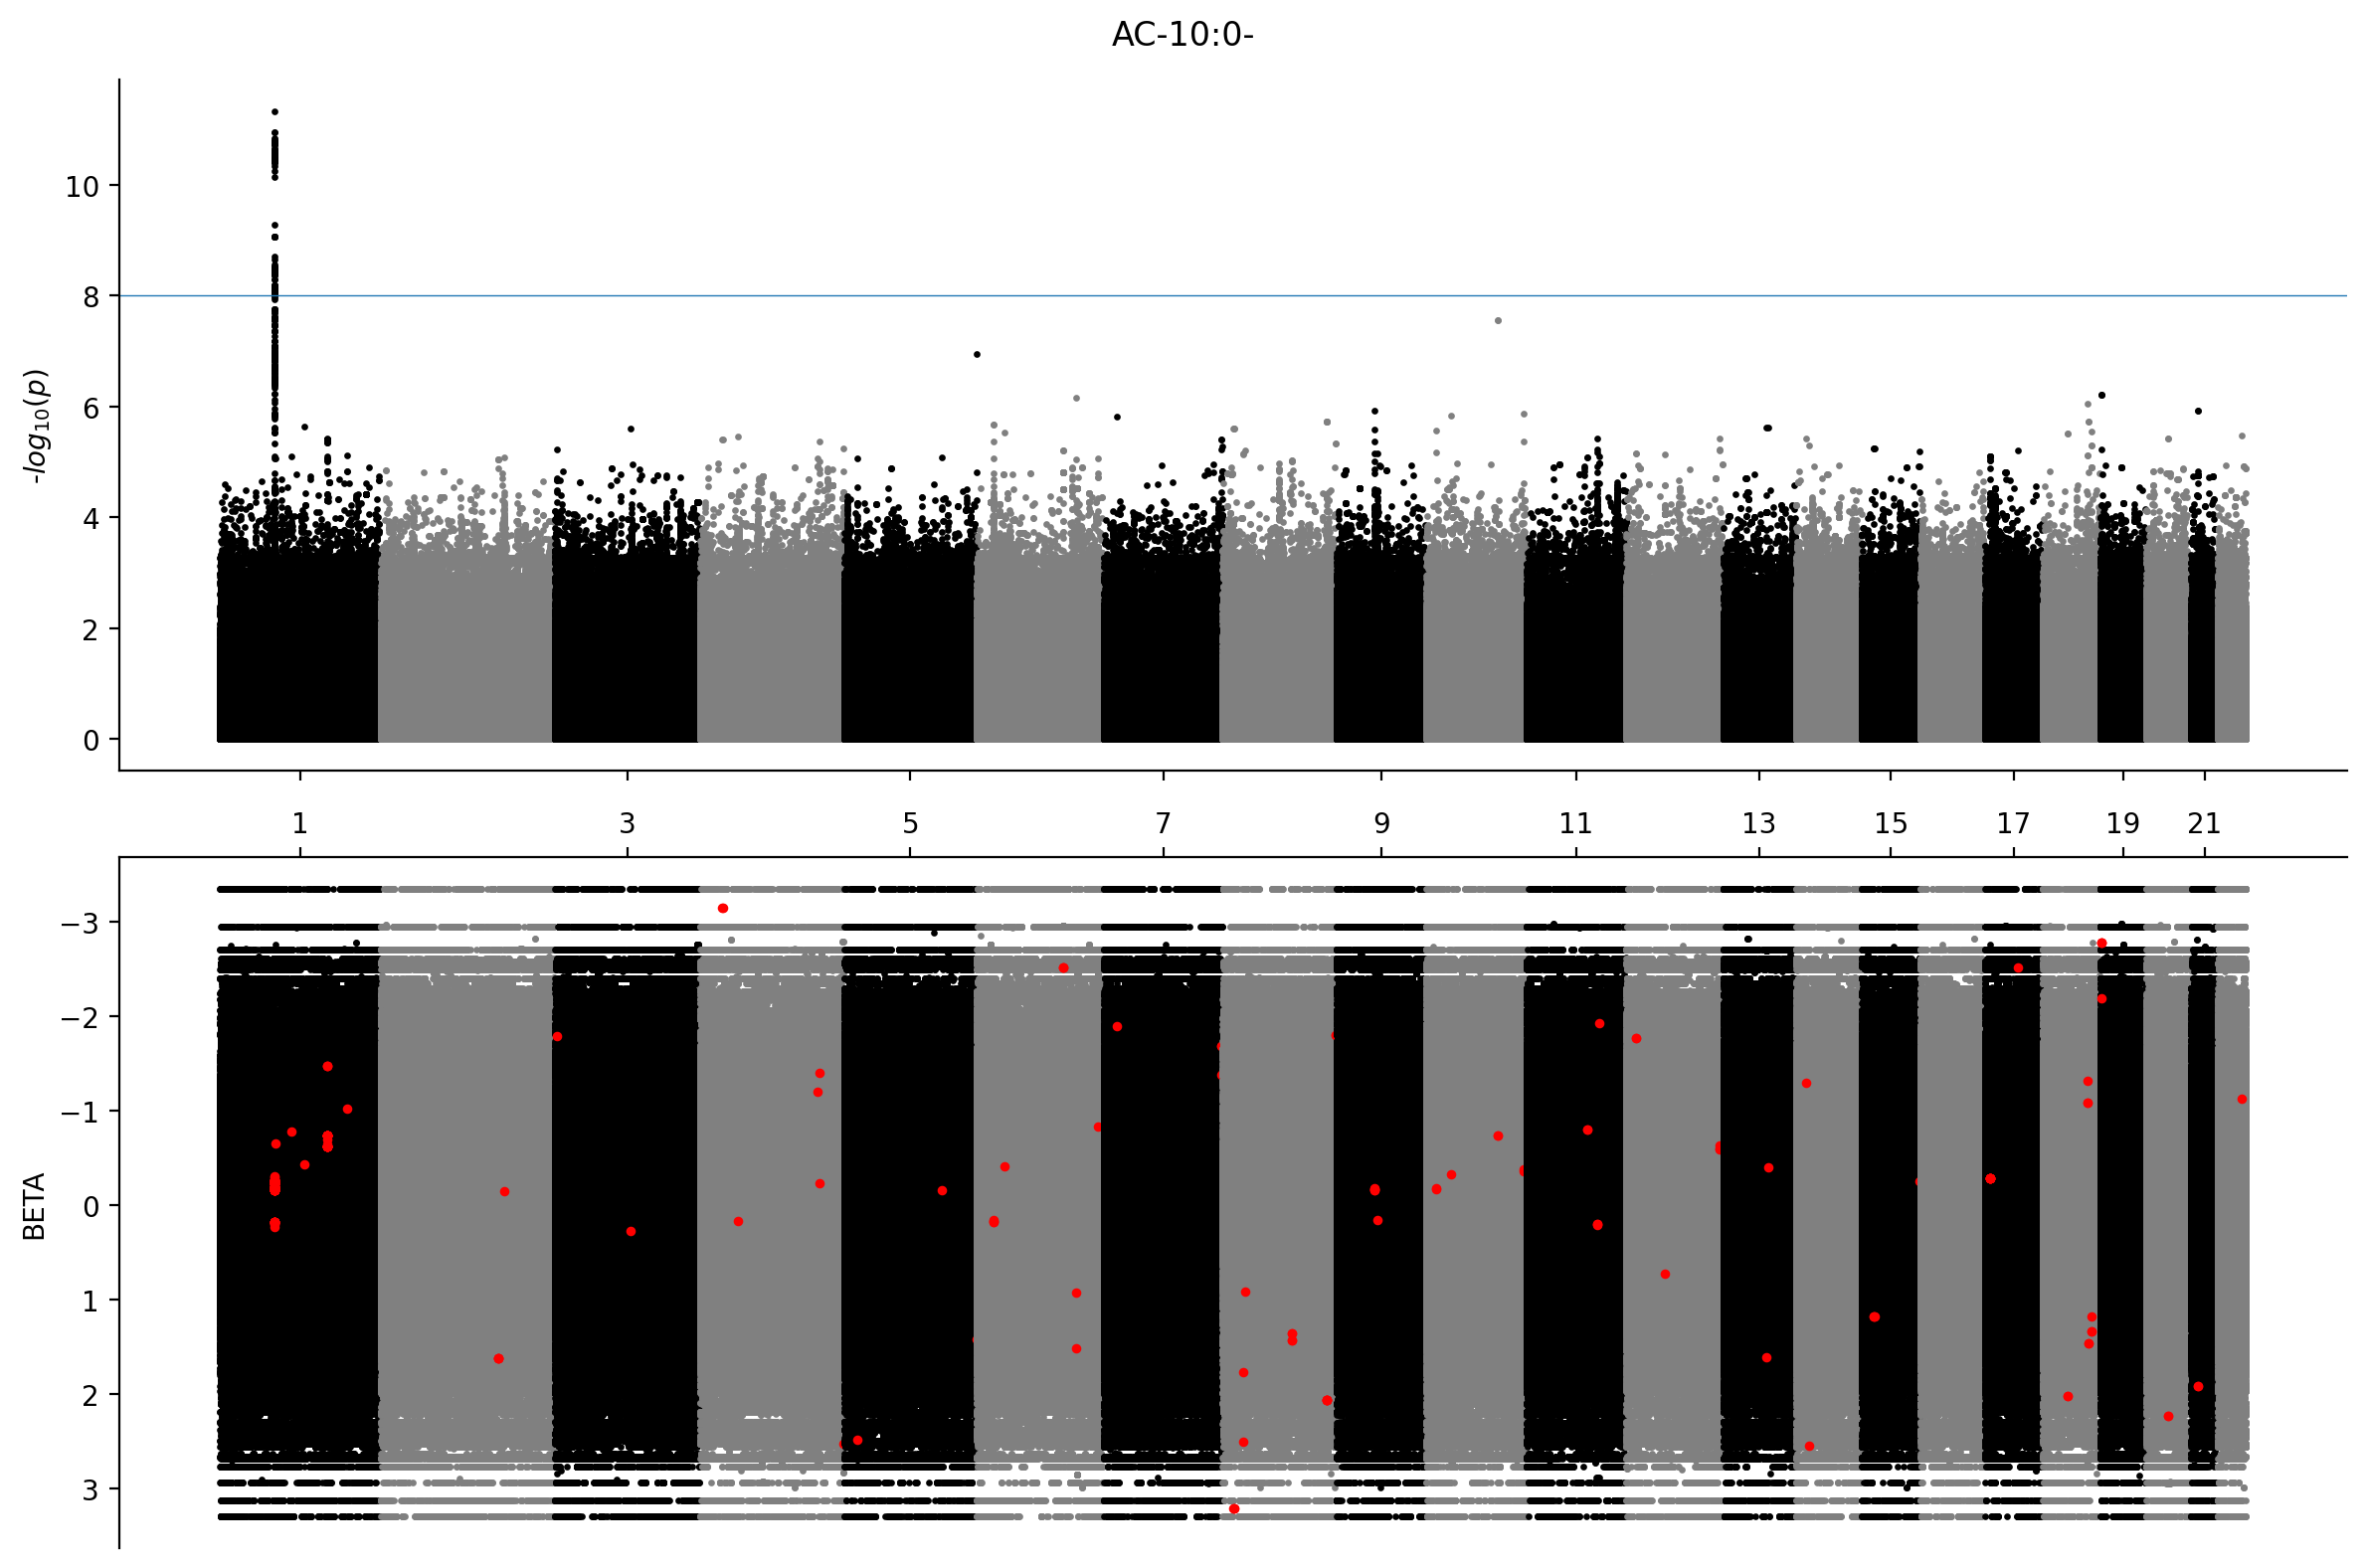

In [216]:
lipid='AC-10:0-'
path = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_species'
fn = f'{lipid}.fastGWA'
df_subset = pd.read_csv(f'{path}/{fn}', sep='\t')
display(df_subset.head())

fig, ax = miami_plot(data_1=df_subset, data_2=df_subset, pval='P', sig_pval=1e-8, pval_2='BETA',
                     markersize_2=6, position='POS', title=lipid, chromosome='CHR', hightlight_threshold=1e-5)



,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P
0,1,chr1:10930:G:A,10930,A,G,1606,0.002491,-0.020225,0.340377,0.952617
1,1,chr1:10989:G:A,10989,A,G,1606,0.000623,-0.071423,0.679477,0.916285
2,1,chr1:11171:CCTTG:C,11171,C,CCTTG,1606,0.020237,0.085762,0.119677,0.473613
3,1,chr1:16375:G:C,16375,C,G,1606,0.000311,0.883209,0.960377,0.357757
4,1,chr1:20489:G:T,20489,T,G,1606,0.000311,-1.626950,0.959771,0.090049


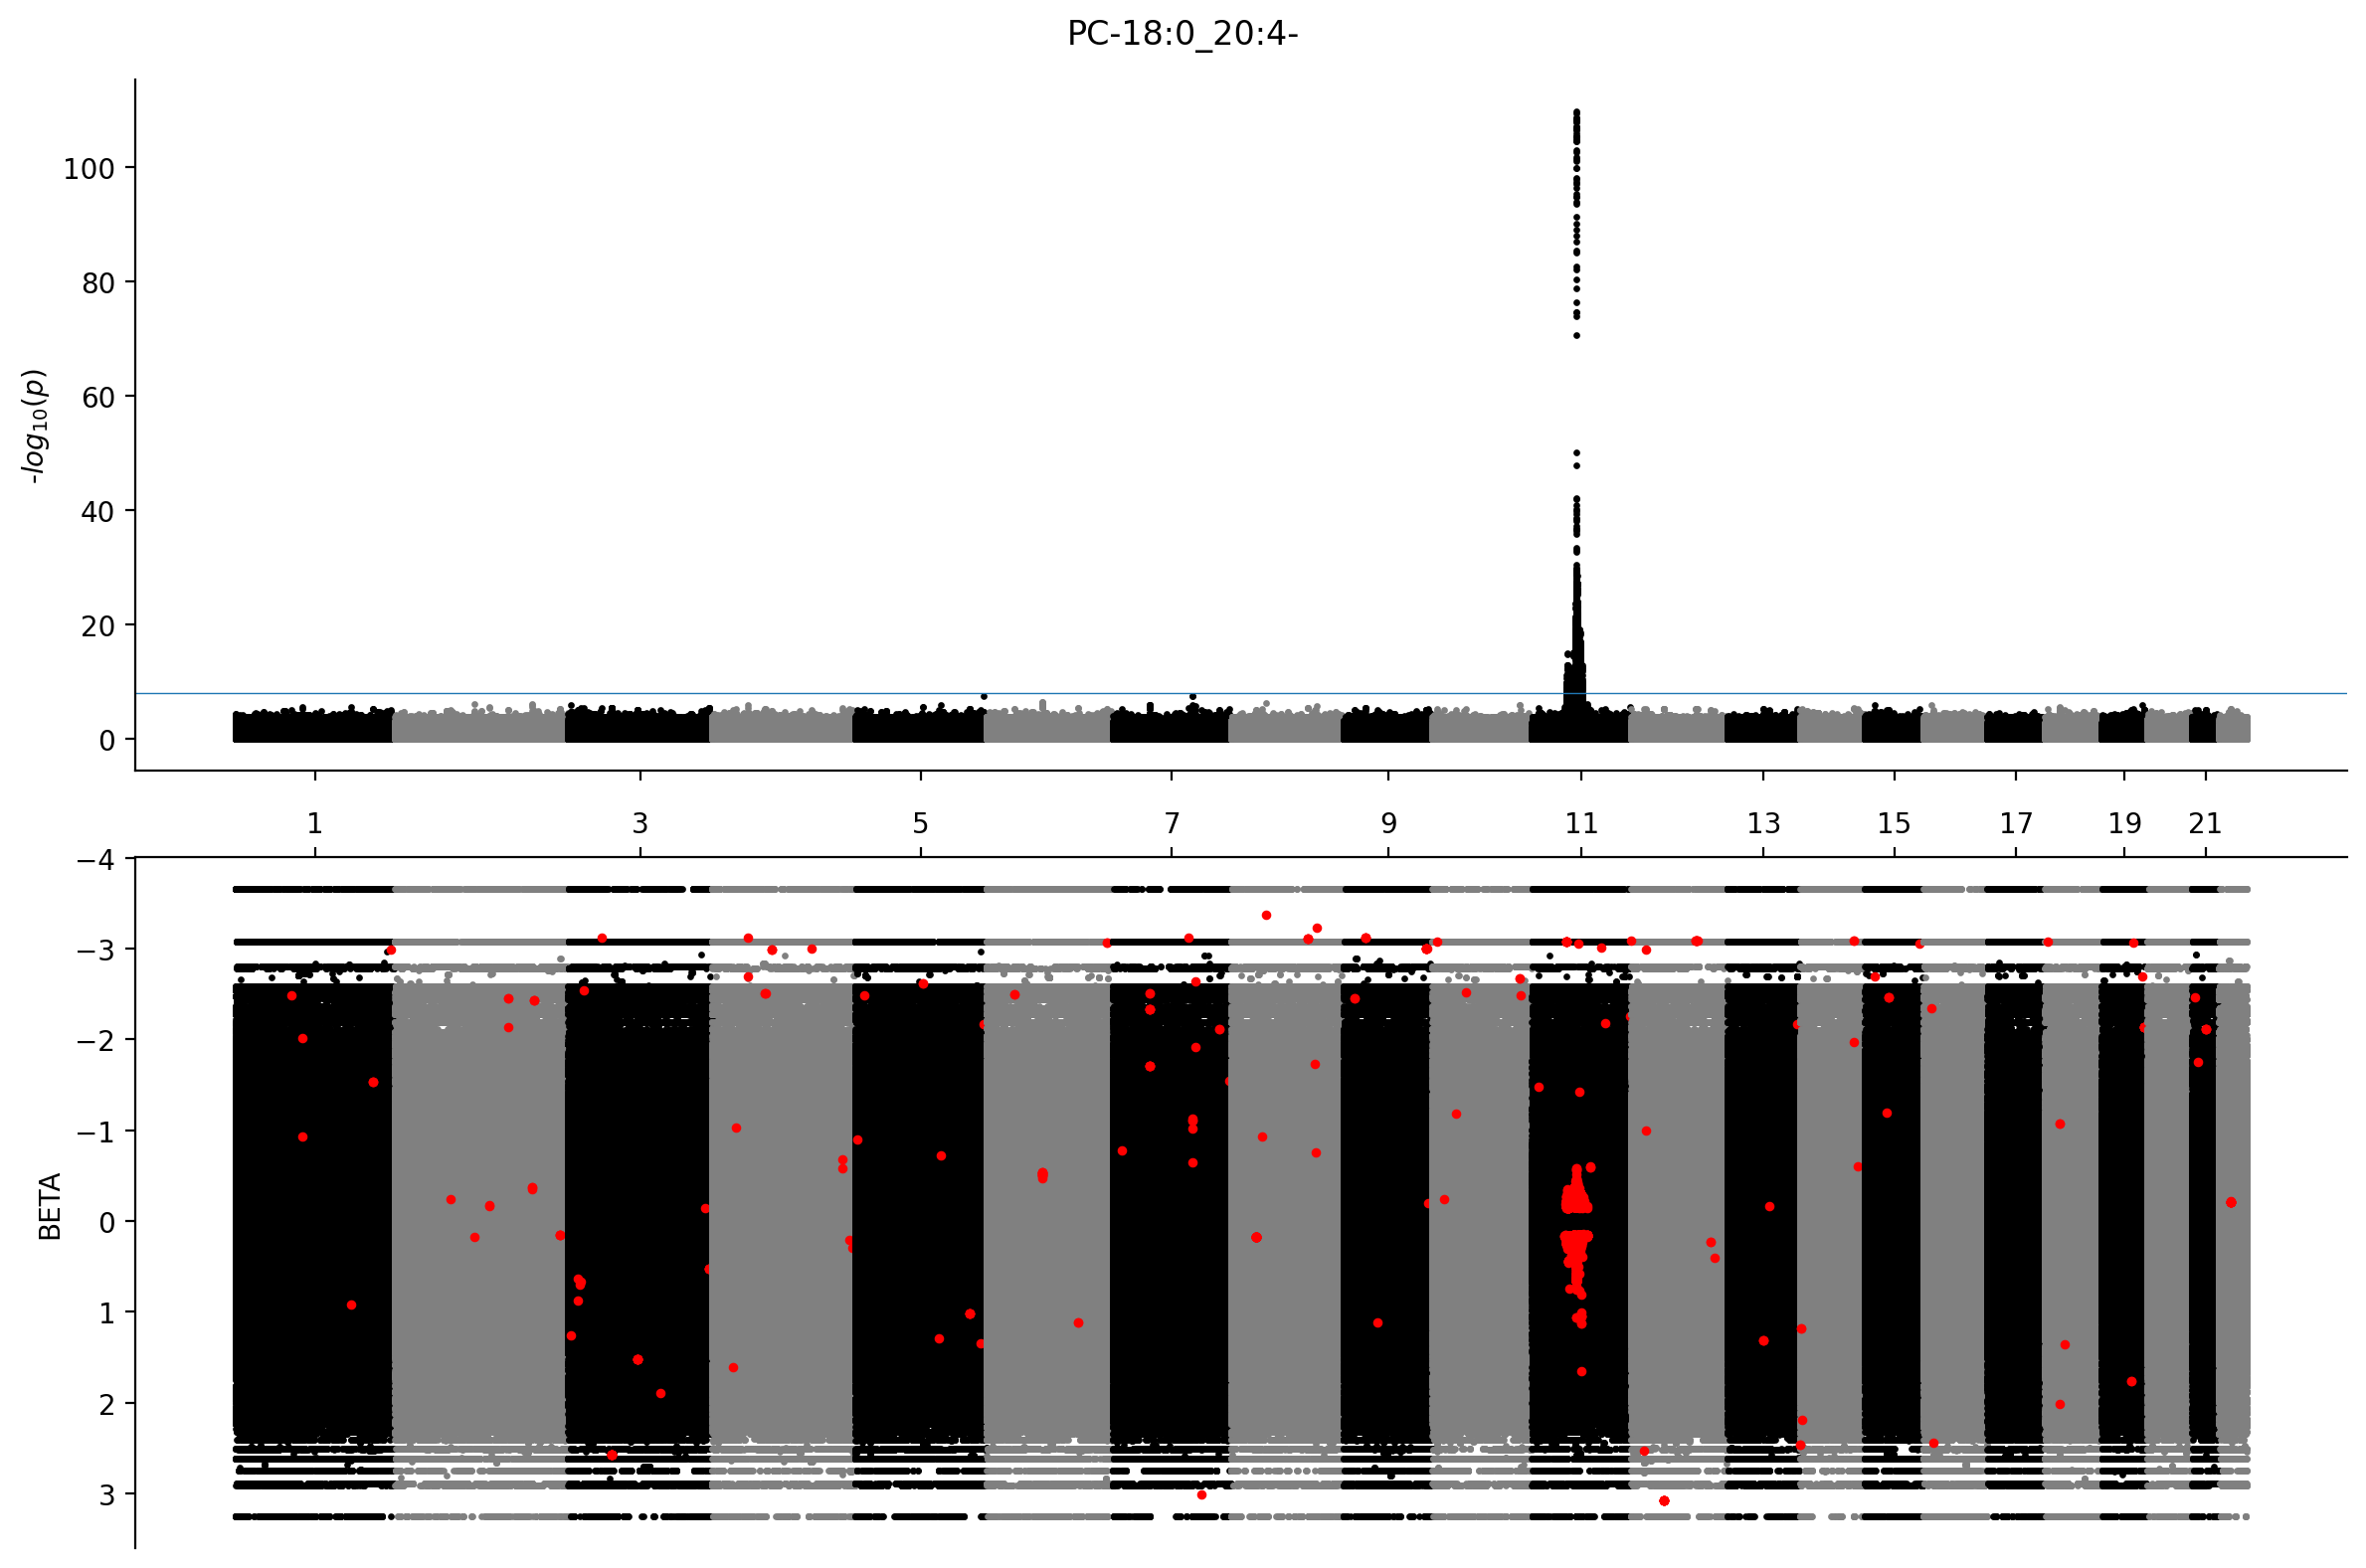

In [212]:
# Lowest test pearson r: 'FA-16:0-' (pearon r=-0.070608)
# Highest test pearson r: 'PC-18:0_20:4-' (pearson r=0.466041)
lipid = 'PC-18:0_20:4-'
path = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_species'
fn = f'{lipid}.fastGWA'
df_subset = pd.read_csv(f'{path}/{fn}', sep='\t')
display(df_subset.head())

fig, ax = miami_plot(data_1=df_subset, data_2=df_subset, pval='P', sig_pval=1e-8, pval_2='BETA',
                     markersize_2=6, position='POS', title=lipid, chromosome='CHR', hightlight_threshold=1e-5)


,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P
0,1,chr1:10930:G:A,10930,A,G,1606,0.002491,0.010795,0.348360,0.975280
1,1,chr1:10989:G:A,10989,A,G,1606,0.000623,-0.815756,0.695118,0.240575
2,1,chr1:11171:CCTTG:C,11171,C,CCTTG,1606,0.020237,-0.158141,0.122440,0.196504
3,1,chr1:16375:G:C,16375,C,G,1606,0.000311,0.626720,0.983037,0.523777
4,1,chr1:20489:G:T,20489,T,G,1606,0.000311,0.919683,0.982893,0.349433


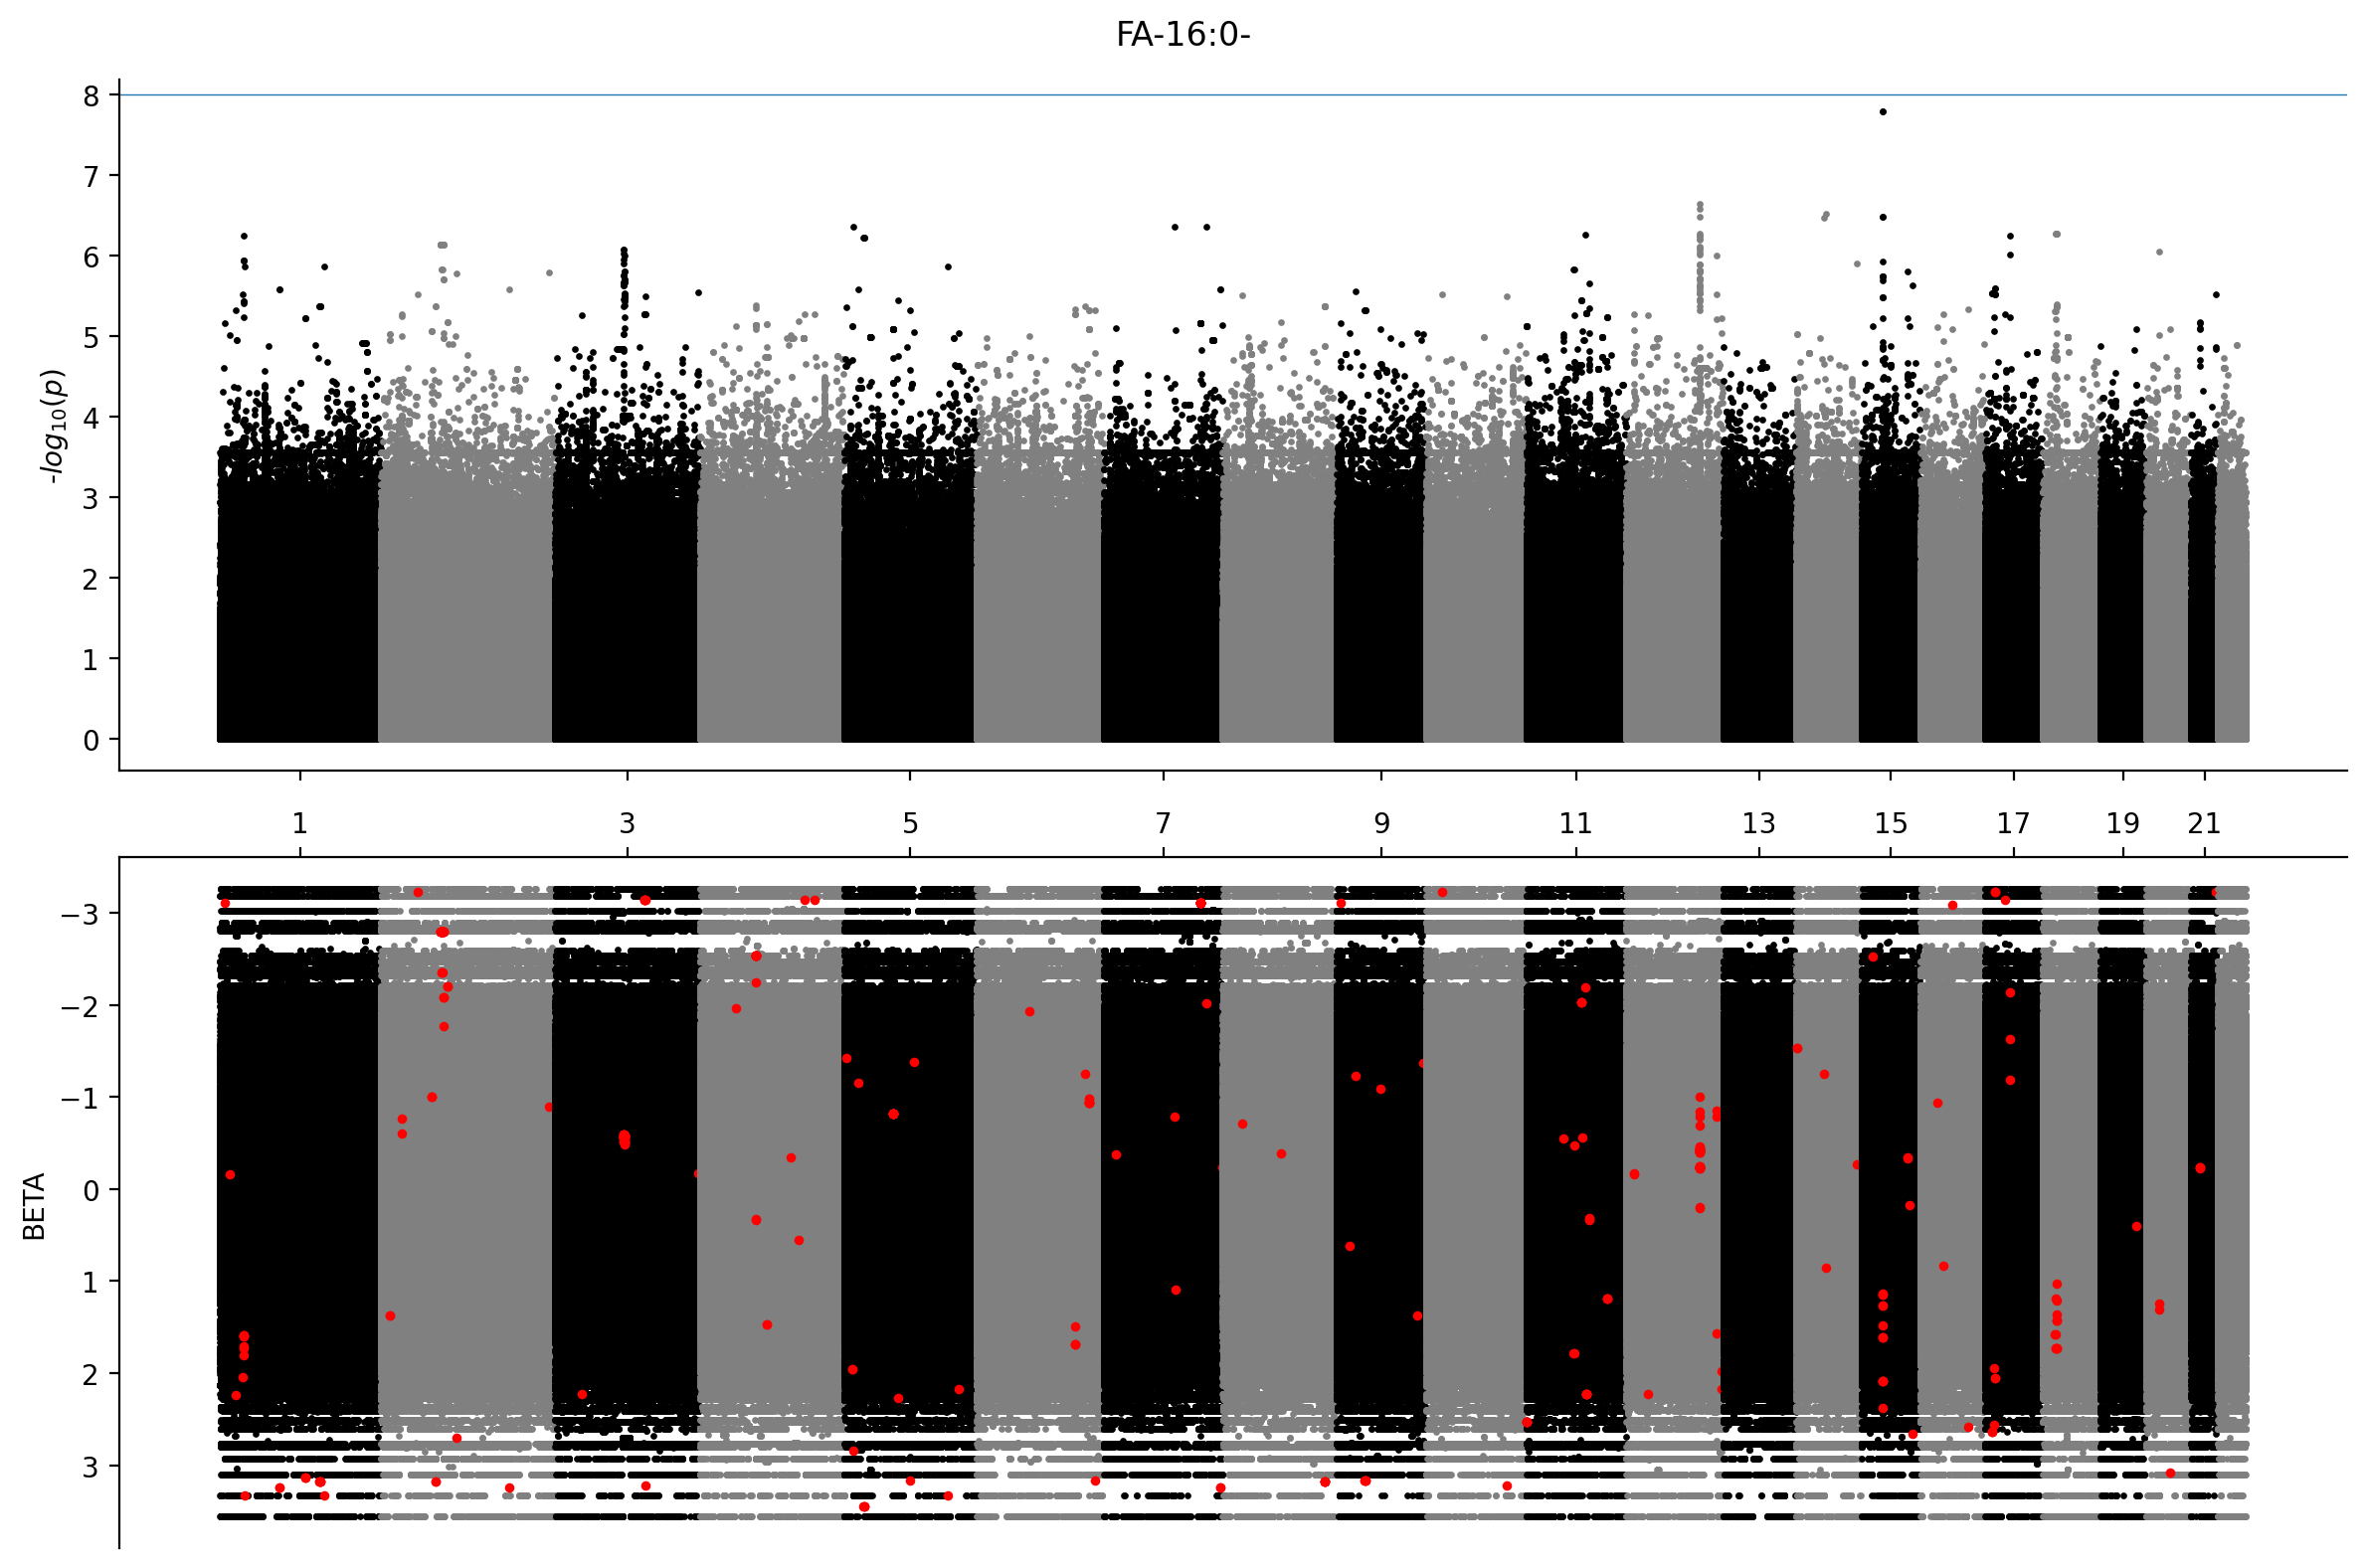

In [213]:
# Lowest test pearson r: 'FA-16:0-'
# Highest test pearson r: 'PC-18:0_20:4-'
lipid = 'FA-16:0-'
path = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_species'
fn = f'{lipid}.fastGWA'
df_subset = pd.read_csv(f'{path}/{fn}', sep='\t')
display(df_subset.head())

fig, ax = miami_plot(data_1=df_subset, data_2=df_subset, pval='P', sig_pval=1e-8, pval_2='BETA',
                     markersize_2=6, position='POS', title=lipid, chromosome='CHR', hightlight_threshold=1e-5)

,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P
0,1,chr1:10930:G:A,10930,A,G,1606,0.002491,0.379076,0.350963,0.280096
1,1,chr1:10989:G:A,10989,A,G,1606,0.000623,0.080755,0.700863,0.908269
2,1,chr1:11171:CCTTG:C,11171,C,CCTTG,1606,0.020237,-0.031751,0.123461,0.797047
3,1,chr1:16375:G:C,16375,C,G,1606,0.000311,-0.147858,0.990858,0.881379
4,1,chr1:20489:G:T,20489,T,G,1606,0.000311,-1.113260,0.990475,0.261028


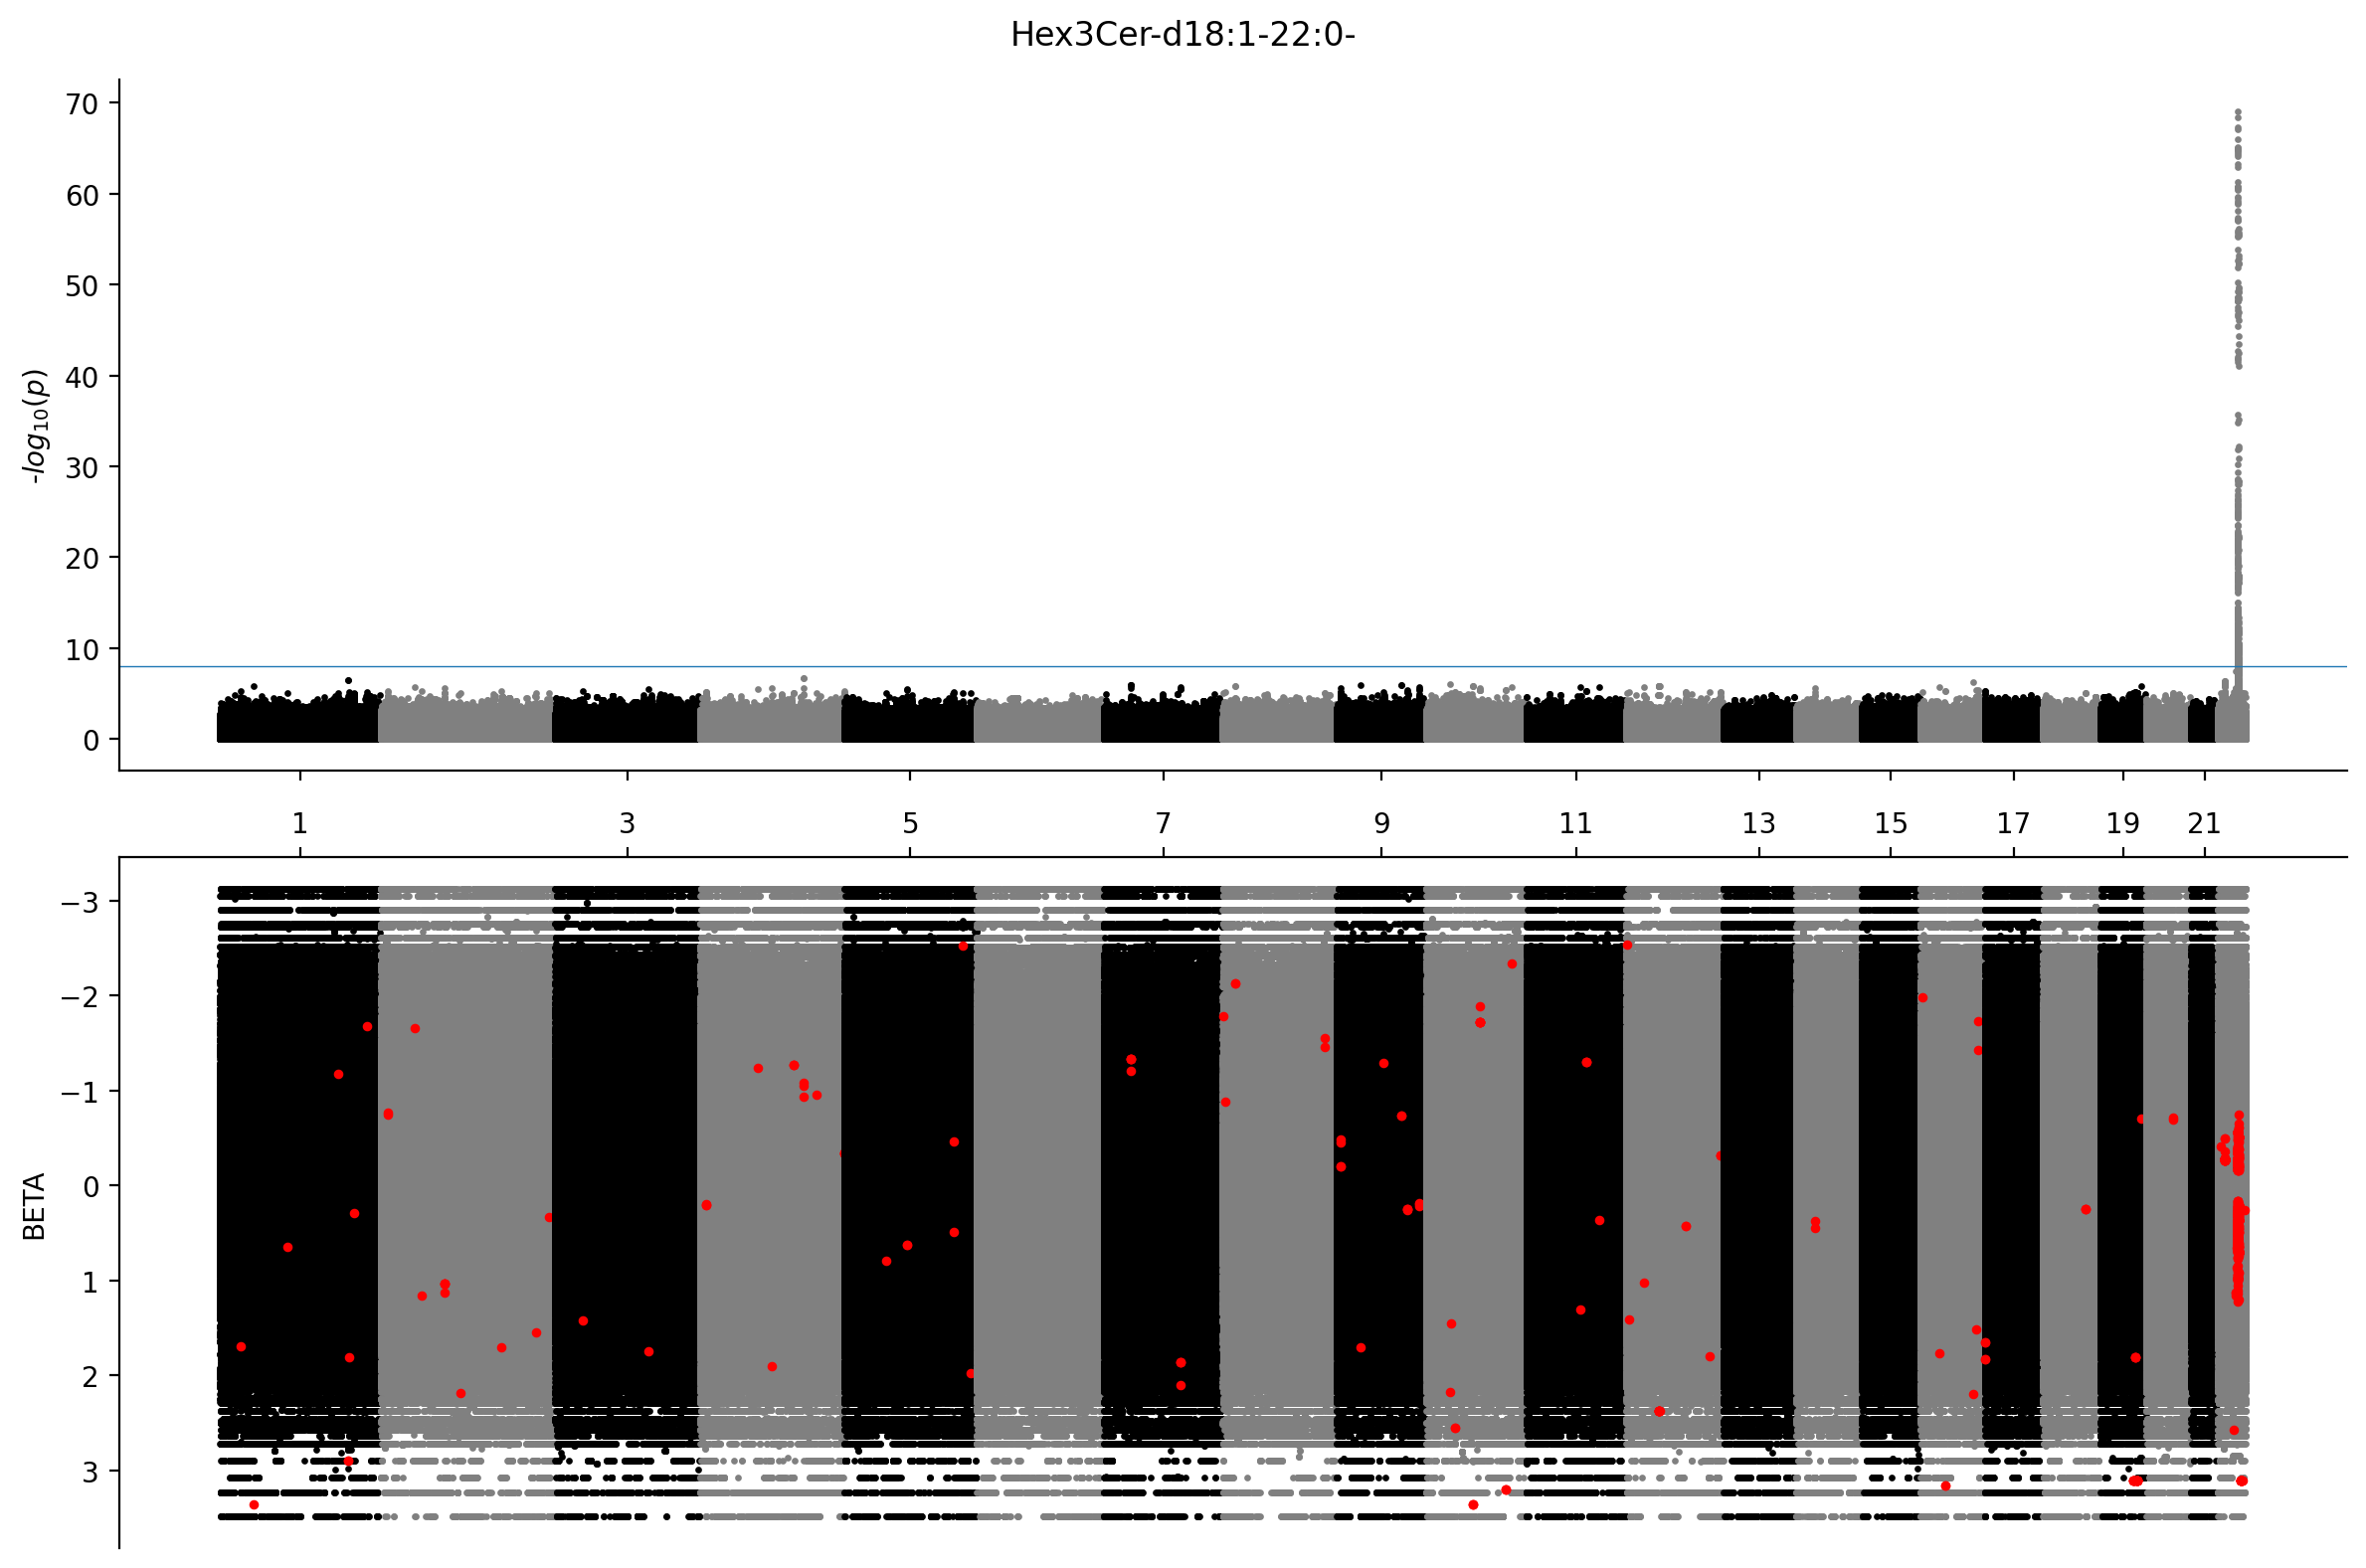

In [215]:
# Hex3Cer(d18:1_22:0): pearosn r=0.376640
lipid = 'Hex3Cer-d18:1-22:0-'
path = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/fastGWA/lipid_species'
fn = f'{lipid}.fastGWA'
df_subset = pd.read_csv(f'{path}/{fn}', sep='\t')
display(df_subset.head())

fig, ax = miami_plot(data_1=df_subset, data_2=df_subset, pval='P', sig_pval=1e-8, pval_2='BETA',
                     markersize_2=6, position='POS', title=lipid, chromosome='CHR', hightlight_threshold=1e-5)

In [ ]:
# dimethyl-CE(20:4)